In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import nltk
import seaborn as sns
from datetime import date
from string import punctuation

nltk.download('punkt')

## modelling
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\camde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def tokenize(phrase):
    '''
    Returns the length of an array of individual words in the string phrase
    phrase: The string to be tokenized
    '''
    tokens = phrase.split()
    return len(tokens)

In [3]:
trump_tweets = pd.read_csv("trump_tweets.csv")
print("Some Trump tweets")
print(trump_tweets.head())
print("")
biden_tweets = pd.read_csv("biden_tweets.csv")
print("Some Biden tweets")
print(biden_tweets.head())

Some Trump tweets
   Unnamed: 0                   id  \
0           0  1314035056441257985   
1           1  1314033009293656065   
2           2  1314028978806624256   
3           3  1314028699084259329   
4           4  1314027975185182721   

                                           full_text  \
0                            https://t.co/wHQx2qd8q2   
1  2010 to 2016 under Kamala Harris's watch as "T...   
2    https://t.co/4Wv5cCFEns https://t.co/kMvBv6Pu9I   
3                            https://t.co/rxqPqR4uqZ   
4                            https://t.co/xGevgI2wTO   

                                            entities           created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:49:05   
1  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:40:57   
2  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:24:56   
3  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:23:49   
4  {'hashtags': [], 'symbols': 

In [4]:
# Add the number of words in each tweet to the Biden and Trump data frames

# Biden

biden_word_counts_list = []
for tweet in biden_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    biden_word_counts_list.append(tweet_length)
biden_tweets["words"] = biden_word_counts_list

# Trump

trump_word_counts_list = []
for tweet in trump_tweets["full_text"]:
    tweet_length = tokenize(tweet)
    trump_word_counts_list.append(tweet_length)
trump_tweets["words"] = trump_word_counts_list

In [5]:
# Convert the Tweet dates to a usable format for the analysis

print("Before fixing the type, the dates have the type: " + str(type(biden_tweets["created_at"][0])))

# Biden
biden_tweets["created_at"] = pd.to_datetime(biden_tweets["created_at"], format='%Y-%m-%d %H:%M:%S')
biden_tweets['date']=biden_tweets['created_at'].dt.date
biden_tweetsbyday = biden_tweets["date"].value_counts().rename_axis('unique_dates').reset_index(name='tweets_each_day')

# Trump
trump_tweets["created_at"] = pd.to_datetime(trump_tweets["created_at"], format='%Y-%m-%d %H:%M:%S')
trump_tweets['date']=trump_tweets['created_at'].dt.date
trump_tweetsbyday=trump_tweets["date"].value_counts().rename_axis('unique_dates').reset_index(name='tweets_each_day')

print("After fixing the type, the dates have the type: " + str(type(biden_tweets["created_at"][0])))

# Source for Biden and Trump tweets by day: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe

Before fixing the type, the dates have the type: <class 'str'>
After fixing the type, the dates have the type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
# Check to see if the conversion preserved the date in the order we expect

print("The most recent tweet we have from Biden was tweeted on: " + str(biden_tweets["created_at"][0]))
print("Biden most recent tweet's year according to Python: " + str(biden_tweets["created_at"][0].year))
print("Biden most recent tweet's month according to Python: " + str(biden_tweets["created_at"][0].month))
print("Biden most recent tweet's day according to Python: " + str(biden_tweets["created_at"][0].day))
print("It appears the conversion was successful")

The most recent tweet we have from Biden was tweeted on: 2020-10-07 02:12:00
Biden most recent tweet's year according to Python: 2020
Biden most recent tweet's month according to Python: 10
Biden most recent tweet's day according to Python: 7
It appears the conversion was successful


In [7]:
# Check to see if we can determine how many days pass between two dates

print("The most recent tweet we have from Biden was tweeted on: " + str(biden_tweets["created_at"][0]))
print("The oldest tweet we have from Biden was tweeted on: " + 
      str(biden_tweets["created_at"][len(biden_tweets["created_at"])-1]))
test_start = biden_tweets["created_at"][len(biden_tweets["created_at"])-1]
test_end = biden_tweets["created_at"][0]
test_start_date = date(test_start.year, test_start.month, test_start.day)
test_end_date = date(test_end.year, test_end.month, test_end.day)
delta = test_end_date - test_start_date
print("Biden's tweets span " + str(delta.days) + " days")
print("2020 is a leap year with 366 days, so the result above is correct.")

# Source: https://www.w3resource.com/python-exercises/python-basic-exercise-14.php

The most recent tweet we have from Biden was tweeted on: 2020-10-07 02:12:00
The oldest tweet we have from Biden was tweeted on: 2019-10-16 02:35:02
Biden's tweets span 357 days
2020 is a leap year with 366 days, so the result above is correct.


In [8]:
# Add a column to the Biden and Trump data frames that shows how many days before the 2020 election each tweet was tweeted

# Start with Biden

biden_days_to_election = np.zeros(len(biden_tweets["created_at"]))
biden_index = 0
election_date = date(2020, 11, 3)
for i in range(len(biden_tweets["created_at"])):
    temp_biden_date = biden_tweets["created_at"][biden_index]
    biden_tweet_date = date(temp_biden_date.year, temp_biden_date.month, temp_biden_date.day)
    biden_delta = election_date - biden_tweet_date
    biden_days_to_election[biden_index] = biden_delta.days
    biden_index += 1
biden_tweets["days_to_election"] = biden_days_to_election
print("Updated Biden data frame" + "\n" + str(biden_tweets.head()))

Updated Biden data frame
   Unnamed: 0                   id  \
0           0  1313663334286323714   
1           1  1313652765319557122   
2           2  1313646473393840128   
3           3  1313641691602202624   
4           4  1313633890289045504   

                                           full_text  \
0                    Please. https://t.co/acHR1Rf8hE   
1  I can’t wait for @KamalaHarris to make history...   
2  Ignore the polls, folks. There’s too much at s...   
3  Think about what it takes for a Black person t...   
4  Look, folks, I'm going to be honest: we'll try...   

                                            entities          created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 02:12:00   
1  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 01:30:00   
2  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 01:05:00   
3  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-07 00:46:00   
4  {'hashtags': [], 'symbols'

In [9]:
# Let's also add a "days_to_election" column to the Biden tweets by day dataframe

biden_days_to_election = np.zeros(len(biden_tweetsbyday["unique_dates"]))
biden_index = 0
election_date = date(2020, 11, 3)
for i in range(len(biden_tweetsbyday["unique_dates"])):
    temp_biden_date = biden_tweetsbyday["unique_dates"][biden_index]
    biden_tweet_date = date(temp_biden_date.year, temp_biden_date.month, temp_biden_date.day)
    biden_delta = election_date - biden_tweet_date
    biden_days_to_election[biden_index] = biden_delta.days
    biden_index += 1
biden_tweetsbyday["days_to_election"] = biden_days_to_election
print("Updated Biden data frame" + "\n" + str(biden_tweetsbyday.head()))

Updated Biden data frame
  unique_dates  tweets_each_day  days_to_election
0   2020-09-30               39              34.0
1   2019-11-21               35             348.0
2   2020-10-06               31              28.0
3   2020-03-16               27             232.0
4   2020-03-04               27             244.0


In [10]:
# The results for Biden look good. Let's do the same thing for Trump's tweets

# Update the Trump tweets data frame

trump_days_to_election = np.zeros(len(trump_tweets["created_at"]))
trump_index = 0
election_date = date(2020, 11, 3)
for i in range(len(trump_tweets["created_at"])):
    temp_trump_date = trump_tweets["created_at"][trump_index]
    trump_tweet_date = date(temp_trump_date.year, temp_trump_date.month, temp_trump_date.day)
    trump_delta = election_date - trump_tweet_date
    trump_days_to_election[trump_index] = trump_delta.days
    trump_index += 1
trump_tweets["days_to_election"] = trump_days_to_election
print("Updated Trump data frame" + "\n" + str(trump_tweets.head()))

Updated Trump data frame
   Unnamed: 0                   id  \
0           0  1314035056441257985   
1           1  1314033009293656065   
2           2  1314028978806624256   
3           3  1314028699084259329   
4           4  1314027975185182721   

                                           full_text  \
0                            https://t.co/wHQx2qd8q2   
1  2010 to 2016 under Kamala Harris's watch as "T...   
2    https://t.co/4Wv5cCFEns https://t.co/kMvBv6Pu9I   
3                            https://t.co/rxqPqR4uqZ   
4                            https://t.co/xGevgI2wTO   

                                            entities          created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:49:05   
1  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:40:57   
2  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:24:56   
3  {'hashtags': [], 'symbols': [], 'user_mentions... 2020-10-08 02:23:49   
4  {'hashtags': [], 'symbols'

In [11]:
# Also update Trump tweets by day

trump_days_to_election = np.zeros(len(trump_tweetsbyday["unique_dates"]))
trump_index = 0
election_date = date(2020, 11, 3)
for i in range(len(trump_tweetsbyday["unique_dates"])):
    temp_trump_date = trump_tweetsbyday["unique_dates"][trump_index]
    trump_tweet_date = date(temp_trump_date.year, temp_trump_date.month, temp_trump_date.day)
    trump_delta = election_date - trump_tweet_date
    trump_days_to_election[trump_index] = trump_delta.days
    trump_index += 1
trump_tweetsbyday["days_to_election"] = trump_days_to_election
print("Updated Biden data frame" + "\n" + str(trump_tweetsbyday.head()))

Updated Biden data frame
  unique_dates  tweets_each_day  days_to_election
0   2020-09-30               62              34.0
1   2020-10-07               48              27.0
2   2020-08-25               45              70.0
3   2020-09-08               44              56.0
4   2020-09-18               41              46.0


To review, here is an explanation for the data manipulation steps above relating to the "days_to_election". For the purposes of this analysis, "days_to_election" represents the number of days before the election the tweet was written. For example, election day was November 3, 2020. Therefore, a tweet from November 2, 2020 would have a "days_to_election" value of 1. Like in this example, November 3, 2020 (election day) was used in calculating the "days_to_election" value for each tweet. To calculate "days_to_election" we first had to convert November 3, 2020 and all the tweet dates to dates that we could perform mathematical operations on. After making these conversions, we simply subtracted the tweet date from election day to get the difference between the two dates.

As you will see below, "days_to_election" is plotted along the x-axis in each of our analyses. We thought plotting "days_to_election" rather than the actual dates along the x-axis would make the most sense because our analysis seeks to determine if some characteristic of the tweets changed as the election drew nearer. In the plots below, negative slopes for the regression line indicate that the measured tweet characteristic is increasing in magnitude as the election nears. On the other hand, a positive slope indicates that the measured tweet characteristic decreased as the election drew nearer. In addition to the red lines of best fit on each plot, you can confirm the slope of the regression line (and significance tests for the slope of each regression line) by reading values in the "days_to_election" variable row in the summary tables above each plot.

                            OLS Regression Results                            
Dep. Variable:                  words   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.13
Date:                Sun, 22 Nov 2020   Prob (F-statistic):            0.00147
Time:                        22:37:33   Log-Likelihood:                -12221.
No. Observations:                3084   AIC:                         2.445e+04
Df Residuals:                    3082   BIC:                         2.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.3277      0.488  

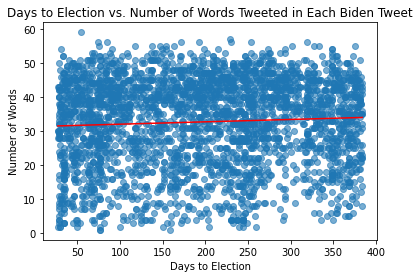

In [12]:
# The updated Trump dataframe looks good as well. Let's begin the analysis, starting with Biden

# Source for t test for linear regression: https://github.com/marcopeix/ISL-linear-regression/blob/master/Linear%20Regression.ipynb

# Biden words vs. days to election

b_days_words_model = linear_model.LinearRegression().fit(biden_tweets[["days_to_election"]], biden_tweets["words"])
b_days_words_predict = b_days_words_model.predict(biden_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(biden_tweets["days_to_election"], biden_tweets["words"], alpha = 0.6)
ax.plot(biden_tweets["days_to_election"], b_days_words_predict, c = "red")
plt.title("Days to Election vs. Number of Words Tweeted in Each Biden Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Words")

b_days_words_est = sm.OLS(biden_tweets["words"], sm.add_constant(biden_tweets[["days_to_election"]]))
b_days_words_est2 = b_days_words_est.fit()
print(b_days_words_est2.summary())

                            OLS Regression Results                            
Dep. Variable:              favourite   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     458.4
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           6.34e-95
Time:                        22:37:34   Log-Likelihood:                -39428.
No. Observations:                3084   AIC:                         7.886e+04
Df Residuals:                    3082   BIC:                         7.887e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               1.1e+05   3305.443  

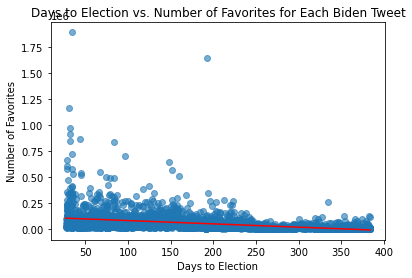

In [13]:
# Biden favorites vs. days to election

b_days_favorites_model = linear_model.LinearRegression().fit(biden_tweets[["days_to_election"]], biden_tweets["favourite"])
b_days_favorites_predict = b_days_favorites_model.predict(biden_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(biden_tweets["days_to_election"], biden_tweets["favourite"], alpha = 0.6)
ax.plot(biden_tweets["days_to_election"], b_days_favorites_predict, c = "red")
plt.title("Days to Election vs. Number of Favorites for Each Biden Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Favorites")

b_days_favorites_est = sm.OLS(biden_tweets["favourite"], sm.add_constant(biden_tweets[["days_to_election"]]))
b_days_favorites_est2 = b_days_favorites_est.fit()
print(b_days_favorites_est2.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     521.4
Date:                Sun, 22 Nov 2020   Prob (F-statistic):          9.34e-107
Time:                        22:37:34   Log-Likelihood:                -33861.
No. Observations:                3084   AIC:                         6.773e+04
Df Residuals:                    3082   BIC:                         6.774e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.994e+04    543.698  

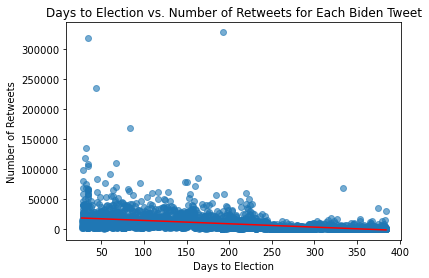

In [14]:
# Biden retweets vs. days to election

b_days_retweets_model = linear_model.LinearRegression().fit(biden_tweets[["days_to_election"]], biden_tweets["retweets"])
b_days_retweets_predict = b_days_retweets_model.predict(biden_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(biden_tweets["days_to_election"], biden_tweets["retweets"], alpha = 0.6)
ax.plot(biden_tweets["days_to_election"], b_days_retweets_predict, c = "red")
plt.title("Days to Election vs. Number of Retweets for Each Biden Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Retweets")

b_days_retweets_est = sm.OLS(biden_tweets["retweets"], sm.add_constant(biden_tweets[["days_to_election"]]))
b_days_retweets_est2 = b_days_retweets_est.fit()
print(b_days_retweets_est2.summary())

                            OLS Regression Results                            
Dep. Variable:        tweets_each_day   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     8.322
Date:                Sun, 22 Nov 2020   Prob (F-statistic):            0.00416
Time:                        22:37:34   Log-Likelihood:                -1048.5
No. Observations:                 358   AIC:                             2101.
Df Residuals:                     356   BIC:                             2109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.9903      0.534  

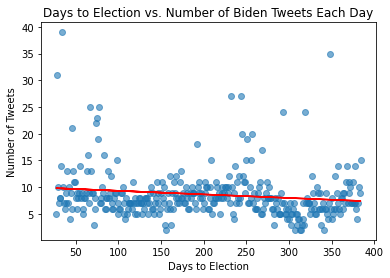

In [15]:
# Biden number of tweets vs. days to election

b_days_tweets_model = linear_model.LinearRegression().fit(biden_tweetsbyday[["days_to_election"]], biden_tweetsbyday["tweets_each_day"])
b_days_tweets_predict = b_days_tweets_model.predict(biden_tweetsbyday[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(biden_tweetsbyday["days_to_election"], biden_tweetsbyday["tweets_each_day"], alpha = 0.6)
ax.plot(biden_tweetsbyday["days_to_election"], b_days_tweets_predict, c = "red")
plt.title("Days to Election vs. Number of Biden Tweets Each Day")
plt.xlabel("Days to Election")
plt.ylabel("Number of Tweets")

b_days_tweets_est = sm.OLS(biden_tweetsbyday["tweets_each_day"], sm.add_constant(biden_tweetsbyday[["days_to_election"]]))
b_days_tweets_est2 = b_days_tweets_est.fit()
print(b_days_tweets_est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  words   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     38.05
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           8.71e-10
Time:                        22:37:35   Log-Likelihood:                -6891.4
No. Observations:                1607   AIC:                         1.379e+04
Df Residuals:                    1605   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0292      1.298  

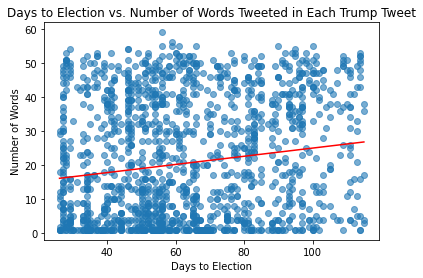

In [16]:
# We will now do the same analysis for Trump's tweets

# Trump words vs. days to election

t_days_words_model = linear_model.LinearRegression().fit(trump_tweets[["days_to_election"]], trump_tweets["words"])
t_days_words_predict = t_days_words_model.predict(trump_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(trump_tweets["days_to_election"], trump_tweets["words"], alpha = 0.6)
ax.plot(trump_tweets["days_to_election"], t_days_words_predict, c = "red")
plt.title("Days to Election vs. Number of Words Tweeted in Each Trump Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Words")

t_days_words_est = sm.OLS(trump_tweets["words"], sm.add_constant(trump_tweets[["days_to_election"]]))
t_days_words_est2 = t_days_words_est.fit()
print(t_days_words_est2.summary())

                            OLS Regression Results                            
Dep. Variable:              favourite   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02254
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.881
Time:                        22:37:35   Log-Likelihood:                -20755.
No. Observations:                1607   AIC:                         4.151e+04
Df Residuals:                    1605   BIC:                         4.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.012e+05   7247.061  

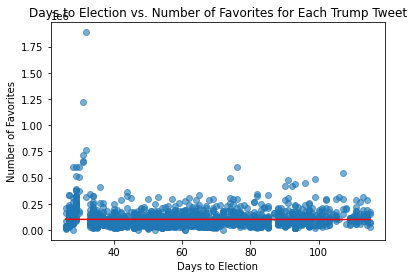

In [17]:
# Trump favorites vs. days to election

t_days_favorites_model = linear_model.LinearRegression().fit(trump_tweets[["days_to_election"]], trump_tweets["favourite"])
t_days_favorites_predict = t_days_favorites_model.predict(trump_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(trump_tweets["days_to_election"], trump_tweets["favourite"], alpha = 0.6)
ax.plot(trump_tweets["days_to_election"], t_days_favorites_predict, c = "red")
plt.title("Days to Election vs. Number of Favorites for Each Trump Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Favorites")

t_days_favorites_est = sm.OLS(trump_tweets["favourite"], sm.add_constant(trump_tweets[["days_to_election"]]))
t_days_favorites_est2 = t_days_favorites_est.fit()
print(t_days_favorites_est2.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.007887
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.929
Time:                        22:37:35   Log-Likelihood:                -18139.
No. Observations:                1607   AIC:                         3.628e+04
Df Residuals:                    1605   BIC:                         3.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.319e+04   1422.648  

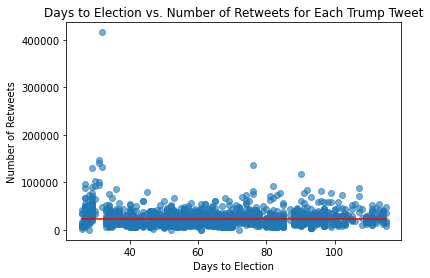

In [18]:
# Trump retweets vs. days to election

t_days_retweets_model = linear_model.LinearRegression().fit(trump_tweets[["days_to_election"]], trump_tweets["retweets"])
t_days_retweets_predict = t_days_retweets_model.predict(trump_tweets[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(trump_tweets["days_to_election"], trump_tweets["retweets"], alpha = 0.6)
ax.plot(trump_tweets["days_to_election"], t_days_retweets_predict, c = "red")
plt.title("Days to Election vs. Number of Retweets for Each Trump Tweet")
plt.xlabel("Days to Election")
plt.ylabel("Number of Retweets")

t_days_retweets_est = sm.OLS(trump_tweets["retweets"], sm.add_constant(trump_tweets[["days_to_election"]]))
t_days_retweets_est2 = t_days_retweets_est.fit()
print(t_days_retweets_est2.summary())

                            OLS Regression Results                            
Dep. Variable:        tweets_each_day   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     20.04
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.28e-05
Time:                        22:37:35   Log-Likelihood:                -337.35
No. Observations:                  89   AIC:                             678.7
Df Residuals:                      87   BIC:                             683.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.9269      3.304  

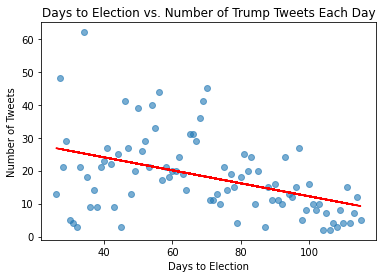

In [19]:
# Trump number of tweets vs. days to election

t_days_tweets_model = linear_model.LinearRegression().fit(trump_tweetsbyday[["days_to_election"]], trump_tweetsbyday["tweets_each_day"])
t_days_tweets_predict = t_days_tweets_model.predict(trump_tweetsbyday[["days_to_election"]])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(trump_tweetsbyday["days_to_election"], trump_tweetsbyday["tweets_each_day"], alpha = 0.6)
ax.plot(trump_tweetsbyday["days_to_election"], t_days_tweets_predict, c = "red")
plt.title("Days to Election vs. Number of Trump Tweets Each Day")
plt.xlabel("Days to Election")
plt.ylabel("Number of Tweets")

t_days_tweets_est = sm.OLS(trump_tweetsbyday["tweets_each_day"], sm.add_constant(trump_tweetsbyday[["days_to_election"]]))
t_days_tweets_est2 = t_days_tweets_est.fit()
print(t_days_tweets_est2.summary())